<a href="https://colab.research.google.com/github/Scor999/Data-Science-Numpy-Matplotlib-Scikit-learn/blob/main/dz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Тема “Обучение с учителем”
## Задание 1   
Импортируйте библиотеки pandas и numpy.   
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.    
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.    
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.   
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.    

### <span style="color:red"> !!! Использую  california housing dataset т.к. "Boston House Prices dataset" удален из библиотеки sklearn. !!! </span>  


In [5]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Загрузим данные "California Housing Prices"
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Разделим данные на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим модель линейной регрессии
lr = LinearRegression()

# Обучим модель на тренировочных данных
lr.fit(X_train, y_train)

# Сделаем предсказания на тестовом наборе
y_pred = lr.predict(X_test)

# Выведем результаты
print(y_pred)


[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]


Задание 2   
Создайте модель под названием model с помощью класса RandomForestRegressor из модуля sklearn.ensemble.  
Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.   
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.    
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [6]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Загрузим данные "California Housing Prices"
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Разделим данные на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим и обучим модель линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# Создадим модель RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

# Обучим модель на тренировочных данных
model.fit(X_train, y_train.values)

# Сделаем предсказания на тестовом наборе
y_pred_rf = model.predict(X_test)

# Посчитаем R2
r2_rf = r2_score(y_test, y_pred_rf)

# Выведем результаты
print(f"R2 score for Linear Regression: {r2_lr}")
print(f"R2 score for RandomForestRegressor: {r2_rf}")

# Сравнение моделей
if r2_rf > r2_lr:
    print("RandomForestRegressor performs better than Linear Regression.")
else:
    print("Linear Regression performs better than RandomForestRegressor.")


R2 score for Linear Regression: 0.595770232606166
R2 score for RandomForestRegressor: 0.7945061536878142
RandomForestRegressor performs better than Linear Regression.


 Из полученных значений R² видно, что модель RandomForestRegressor значительно лучше справляется с задачей прогнозирования, чем модель линейной регрессии.  
> ### Линейная регрессия:
Модель пытается найти линейную зависимость между входными признаками и целевой переменной.    
R² = 0.595770232606166: Это означает, что около 59.6% вариации в целевой переменной объясняется входными признаками.  
> ### RandomForestRegressor:  
Модель использует множество деревьев решений и объединяет их предсказания для улучшения точности и предотвращения переобучения.
R² = 0.7945061536878142: Это означает, что около 79.5% вариации в целевой переменной объясняется входными признаками, что значительно лучше.




*Задание 3  
Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.  
С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [9]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Загрузим данные "California Housing Prices"
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Разделим данные на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим модель RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

# Обучим модель на тренировочных данных
model.fit(X_train, y_train.values)

# Посчитаем R2
y_pred_rf = model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# Получим важности признаков
importances = model.feature_importances_

# Сумма всех показателей важности
total_importance = np.sum(importances)
print(f"Total importance: {total_importance}")

# Найдем два признака с наибольшей важностью
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(2)

print("Top 2 important features:")
print(top_features)




Total importance: 0.9999999999999999
Top 2 important features:
    Feature  Importance
0    MedInc    0.559269
5  AveOccup    0.139126


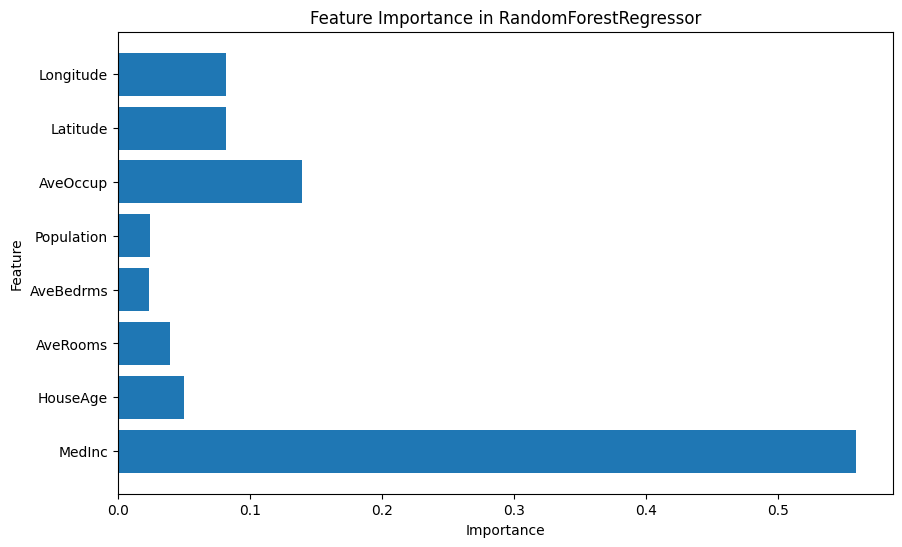

In [10]:
import matplotlib.pyplot as plt

# Построим график важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()


In [11]:
# Выведем документацию для RandomForestRegressor и атрибута feature_importances_
print(RandomForestRegressor.__doc__)
print(RandomForestRegressor.feature_importances_.__doc__)


    A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"squared_error", "absolute_error", "friedman_mse", "poisson"},             default="squared_error"
        The function to measure the quality of a split. Supported criteria
        are "squared_error" for the mean squared error, which is equal to
        variance reduction as feat

*Задание 4  
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакции по кредитной карте являются мошенническими.  Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.  
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:  
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.  
Создайте датафрейм X из датафрейма df, исключив столбец Class.  
Создайте объект Series под названием y из столбца Class.  
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.  
Просмотрите информацию о их форме.  
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],  
'max_features': np.arange(3, 5),  
'max_depth': np.arange(4, 7)}]  
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,  
scoring='roc_auc',  
cv=3.
Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.  
Предскажите вероятности классов с помощью полученной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.   
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

# Загрузим датасет
df = pd.read_csv('creditcard.csv')

# Проверим, сбалансирована ли выборка
print(df['Class'].value_counts(normalize=True))

# Проверим информацию о данных
print(df.info())

# Настройка отображения всех столбцов
pd.options.display.max_columns = 100

# Просмотр первых 10 строк датафрейма
print(df.head(10))

# Создаем датафрейм X, исключая столбец Class
X = df.drop('Class', axis=1)

# Создаем объект Series y из столбца Class
y = df['Class']

# Разделим данные на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Проверим информацию о форме данных
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Параметры для поиска по сетке
parameters = [{'n_estimators': [10, 15],
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}]

# Создаем модель GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                           param_grid=parameters,
                           scoring='roc_auc',
                           cv=3)

# Обучаем модель на тренировочном наборе данных
grid_search.fit(X_train, y_train)

# Просмотр параметров лучшей модели
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Предсказание вероятностей классов
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Вычисление AUC на тестовых данных
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC on test data: {auc}")

# Предсказание вероятностей классов на тренировочном наборе данных для сравнения
y_train_pred_proba = grid_search.predict_proba(X_train)[:, 1]

# Вычисление AUC на тренировочных данных
train_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"AUC on training data: {train_auc}")


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-

### Визуализация ROC-кривой для оценки производительности модели на тестовых данных.

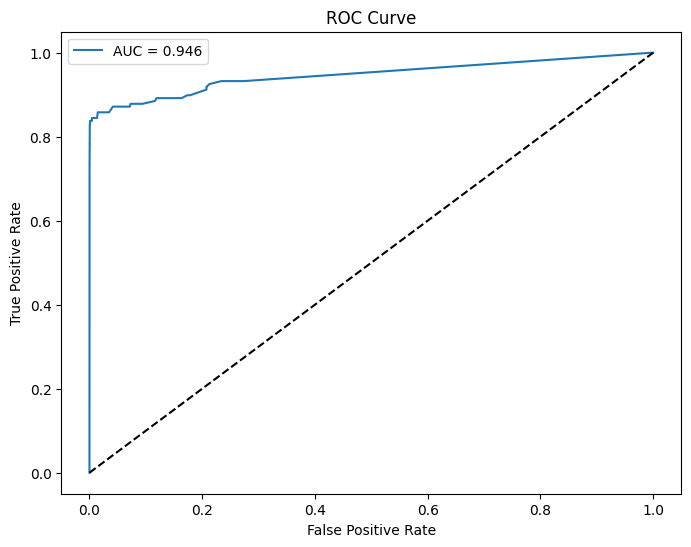

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC-кривая для тестовых данных
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
